# 📊 Exploratory Data Analysis (EDA) for Fashion MNIST Dataset

## Overview
In this notebook, we will perform an exploratory data analysis (EDA) on the Fashion MNIST dataset. The primary goals of this analysis are:

1. **Data Inspection**: Load the dataset and inspect its structure.
2. **Data Cleansing**: Check for missing values, duplicates, and outliers.
3. **Descriptive Statistics**: Calculate key statistics for the dataset.
4. **Data Visualization**: Visualize class distributions, sample images, and apply dimensionality reduction techniques like PCA and t-SNE.

## Dataset Information
The dataset contains grayscale images (28x28 pixels) of 10 different fashion categories:
- **T-shirt/top**
- **Trouser**
- **Pullover**
- **Dress**
- **Coat**
- **Sandal**
- **Shirt**
- **Sneaker**
- **Bag**
- **Ankle boot**

## Structure of the Notebook
1. **Importing Necessary Libraries**
2. **Loading the Dataset**
3. **Initial Data Inspection**
4. **Data Cleaning and Transformation**
5. **Descriptive Statistics**
6. **Data Visualization**

In [1]:
# Importing necessary modules for data processing, visualization, and analysis

# Core data manipulation libraries
import pandas as pd  # For DataFrame operations
import numpy as np  # For numerical operations

# PyTorch modules for image transformations and loading datasets
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# Scikit-Learn modules for data processing and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training, validation, and test sets
from sklearn.preprocessing import StandardScaler  # For data standardization
from sklearn.manifold import TSNE  # t-SNE for 2D visualization of high-dimensional data
from sklearn.decomposition import PCA  # PCA for dimensionality reduction

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For enhanced data visualization

# System and file handling
import os  # For interacting with the file system

# Utility functions for saving plots (ensure you have defined save_plot in your notebook or utils script)
import matplotlib

# Set a style for seaborn plots
sns.set(style="whitegrid")

# Enable interactive plots (optional, if you are using Jupyter Notebook)
%matplotlib inline

In [2]:
# Define the directory where CSV files are stored
csv_dir = "../data_preparation"

# Loading the Fashion MNIST dataset from CSV files into Pandas DataFrames
train_df = pd.read_csv(os.path.join(csv_dir, "train_data.csv"))
validation_df = pd.read_csv(os.path.join(csv_dir, "validation_data.csv"))
test_df = pd.read_csv(os.path.join(csv_dir, "test_data.csv"))

# Print shapes of the loaded DataFrames for verification
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {validation_df.shape}")
print(f"Test DataFrame shape: {test_df.shape}")

print("✅ CSV files loaded successfully from the data_preparation folder!")

Training DataFrame shape: (48000, 785)
Validation DataFrame shape: (12000, 785)
Test DataFrame shape: (10000, 785)
✅ CSV files loaded successfully from the data_preparation folder!


In [3]:
# Load the Fashion MNIST dataset (only for class names and index mapping)
dummy_data = datasets.FashionMNIST(root="../data", train=True, download=True)

class_to_idx = dummy_data.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Display the mappings
print(f"Mapping of class to index: {class_to_idx}")
print(f"Index to class mapping: {idx_to_class}")

Mapping of class to index: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
Index to class mapping: {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


### EDA: Display the first few rows of the test DataFrame to verify data integrity


In [4]:
# Displaying the first few rows of the training DataFrame
print(train_df.head())

   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      1      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      1      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0      0.0      0.0  ...   0.000000   0.003922   0.000000   0.003922   
1      0.0      0.0  ...   0.000000   0.000000   0.000000   0.000000   
2      0.0      0.0  ...   0.650980   0.364706   0.239216   0.113725   
3      0.0      0.2  ...   0.274510   0.168627   0.082353   0.000000   
4      0.0      0.0  ...   0.011765   0.007843   0.000000   0.000000   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0        0.0        0.0        0.0        0.0 

In [5]:
# Displaying the first few rows of the validation DataFrame
print(validation_df.head())

   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      8      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      8      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      3      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      1      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      3      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0      0.0      0.0  ...   0.000000        0.0        0.0        0.0   
1      0.0      0.0  ...   0.000000        0.0        0.0        0.0   
2      0.0      0.0  ...   0.474510        0.0        0.0        0.0   
3      0.0      0.0  ...   0.000000        0.0        0.0        0.0   
4      0.0      0.0  ...   0.003922        0.0        0.0        0.0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0        0.0        0.0        0.0        0.0 

In [6]:
# Displaying the first few rows of the test DataFrame
print(test_df.head())

   label  pixel_0  pixel_1  pixel_2   pixel_3  pixel_4   pixel_5   pixel_6  \
0      9      0.0      0.0      0.0  0.000000      0.0  0.000000  0.000000   
1      2      0.0      0.0      0.0  0.000000      0.0  0.000000  0.000000   
2      1      0.0      0.0      0.0  0.000000      0.0  0.000000  0.000000   
3      1      0.0      0.0      0.0  0.000000      0.0  0.000000  0.000000   
4      6      0.0      0.0      0.0  0.007843      0.0  0.003922  0.003922   

   pixel_7   pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0      0.0  0.000000  ...   0.000000   0.000000        0.0   0.000000   
1      0.0  0.000000  ...   0.007843   0.011765        0.0   0.011765   
2      0.0  0.003922  ...   0.643137   0.227451        0.0   0.000000   
3      0.0  0.000000  ...   0.003922   0.000000        0.0   0.000000   
4      0.0  0.000000  ...   0.278431   0.047059        0.0   0.000000   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0   0.000000   0.00000

#### Explanation

In this section, we use the `.head()` method to inspect the first few rows of the **training**, **validation**, and **test** DataFrames. Each DataFrame consists of **785 columns**: the first column is the `label` (representing the class of the image), followed by **784 columns** representing the pixel values of the 28x28 image (flattened).

- The pixel values are **normalized** (ranging from 0 to 1), indicating preprocessing steps applied to the data.
- The `label` column in the training DataFrame contains class names (e.g., "T-shirt/top"), while the validation and test DataFrames have numeric labels. This will be standardized in subsequent steps.
- The `.head()` output confirms that the data was loaded correctly and provides an overview of its structure, which is crucial before diving into further analysis.


#### Checking shapes of the datasets

In [7]:
# Display the number of samples (rows) and features (columns) for each dataset
print(f"Shape of the train dataset: {train_df.shape}")
print(f"Shape of the validation dataset: {validation_df.shape}")
print(f"Shape of the test dataset: {test_df.shape}")

Shape of the train dataset: (48000, 785)
Shape of the validation dataset: (12000, 785)
Shape of the test dataset: (10000, 785)


### Data Overview

In [8]:
# Display information about the train datasets
print("Training Data Info:")
print(train_df.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 785 entries, label to pixel_783
dtypes: float64(784), int64(1)
memory usage: 287.5 MB
None


In [9]:
# Display information about the validation dataset
print("\nValidation Data Info:")
print(validation_df.info())



Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 785 entries, label to pixel_783
dtypes: float64(784), int64(1)
memory usage: 71.9 MB
None


In [10]:
# Display information about the test dataset
print("\nTest Data Info:")
print(test_df.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel_783
dtypes: float64(784), int64(1)
memory usage: 59.9 MB
None


### Explanation

In this section, we use the `.info()` method to get a summary of each dataset (training, validation, and test). This provides important information about the structure of the DataFrames:

- **Entries**: The number of samples in each dataset.
  - The training dataset has **51,000 samples**.
  - The validation dataset has **9,000 samples**.
  - The test dataset has **10,000 samples**.
- **Columns**: Each DataFrame contains **785 columns**:
  - The first column is the `label` column, representing the class of the image.
  - The remaining **784 columns** represent the pixel values of the 28x28 image (flattened).
- **Data Types**: All columns are of type `float64`, indicating that the pixel values are stored as floating-point numbers. This suggests that the data has been normalized (scaled between 0 and 1).
- **Memory Usage**: The memory usage varies for each dataset, with the training set consuming the most memory due to its larger size.

This preliminary inspection helps confirm that the data has been loaded correctly and gives us an idea of its structure before we proceed with further analysis.

### Statistical Summary

In [11]:
# Display statistical summary of the pixel values
print("\nTraining Data Description:")
print(train_df.describe())


Training Data Description:
              label       pixel_0       pixel_1       pixel_2       pixel_3  \
count  48000.000000  48000.000000  48000.000000  48000.000000  48000.000000   
mean       4.504167      0.000004      0.000024      0.000120      0.000401   
std        2.874070      0.000405      0.001048      0.003172      0.009659   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.000000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      0.062745      0.141176      0.466667      0.611765   

            pixel_4       pixel_5       pixel_6       pixel_7       pixel_8  \
count  48000.000000  48000.000000  48000.000000  48000.000000  48000.000000   
mean       0.000896      0.001549      0.003185      0.008739      0.022273   
std        0.015590    

### Explanation

In this section, we use the `.describe()` method to obtain a statistical summary of the training DataFrame. This summary provides key statistics for each column, helping us understand the distribution of pixel values and the label column:

- **Count**: The total number of non-missing values for each column. For the training dataset, all columns have **51,000 entries**, indicating no missing data.
- **Mean**: The average value for each column. For pixel columns, the mean is close to **0**, suggesting that the images are mostly dark (background pixels are black).
- **Standard Deviation (std)**: Measures the spread of pixel values. A higher standard deviation indicates more variation in pixel intensities.
- **Minimum (min)** and **Maximum (max)** Values:
  - The pixel values range from **0** to **1**, confirming that the data has been **normalized**.
  - The `label` column ranges from **0** to **9**, corresponding to the 10 different classes in the Fashion MNIST dataset.
- **Percentiles (25%, 50%, 75%)**:
  - The **25%**, **50%** (median), and **75%** percentiles help us understand the distribution of pixel values. Most pixel values are at **0** (indicating dark pixels), as shown by the percentiles being **0**.
  - The high percentage of **0** values in the pixel columns suggests that a large portion of the image is background (black pixels).

### **Interpretation:**
- The summary shows that most pixel values are concentrated near **0**, indicating a high proportion of background pixels in the images.
- The maximum value for many pixel columns is **1**, indicating that some pixels are fully white, which is expected after normalization.
- The `label` column has values ranging from **0** to **9**, which aligns with the 10 classes in the Fashion MNIST dataset.

This statistical overview provides useful insights into the dataset and confirms that the pixel values have been appropriately normalized. It also helps us verify that there are no missing values or anomalies in the data.


In [12]:
# Calculate descriptive statistics for pixel values
pixel_stats = train_df.iloc[:, 1:].describe().T
print(pixel_stats[['mean', 'std', 'min', 'max']])

               mean       std  min       max
pixel_0    0.000004  0.000405  0.0  0.062745
pixel_1    0.000024  0.001048  0.0  0.141176
pixel_2    0.000120  0.003172  0.0  0.466667
pixel_3    0.000401  0.009659  0.0  0.611765
pixel_4    0.000896  0.015590  0.0  0.823529
...             ...       ...  ...       ...
pixel_779  0.070283  0.177134  0.0  1.000000
pixel_780  0.033138  0.115313  0.0  1.000000
pixel_781  0.010534  0.067389  0.0  1.000000
pixel_782  0.003123  0.035246  0.0  1.000000
pixel_783  0.000268  0.007946  0.0  0.666667

[784 rows x 4 columns]


## Interpretation of Per-Pixel Statistics:

- **Mean**: The mean value of each pixel indicates the average pixel intensity across all images in the dataset. In this case, many pixels have a mean close to `0`, suggesting that most of these pixels represent background areas (dark regions) across multiple images. Higher mean values would indicate areas that frequently have brighter (or more intense) pixels.

- **Standard Deviation (`std`)**: The standard deviation reflects the variability in pixel intensity. Pixels with low standard deviation are consistent in their intensity values across the dataset, likely corresponding to background areas that remain dark. Conversely, pixels with higher standard deviation are more varied, indicating areas where features like clothing items are more likely to appear.

- **Minimum (`min`) and Maximum (`max`) Values**:
  - The minimum value for each pixel is `0`, which confirms that the pixel values have been normalized, as expected, to fall within the range `[0, 1]`.
  - The maximum value being `1` for many pixels also indicates the presence of high-intensity values (brighter pixels), likely corresponding to the features of the clothing items (e.g., white areas of a T-shirt or sneaker).

### Overall Trends:
- Many pixels have a mean close to `0` with low standard deviation, suggesting that a large portion of the dataset is dominated by background pixels, which are generally dark.
- Pixels with higher mean and standard deviation values are more likely to correspond to the central regions of the images where the actual clothing items appear.

### Insights:
1. **Data Quality**: The statistics confirm that the pixel values are properly normalized between `0` and `1`, ensuring consistency for model training.
2. **Redundant Pixels**: Pixels with very low mean and standard deviation (e.g., corners of the image) are likely redundant and may not provide significant information for distinguishing between classes.
3. **Feature-Rich Pixels**: Pixels with higher mean and standard deviation may represent key features of the clothing items and are likely to be more important during model training.

### Checking for Missing Values

In [13]:
# Check for missing values
print("Missing values in training data:", train_df.isnull().sum().sum())
print("Missing values in validation data:", validation_df.isnull().sum().sum())
print("Missing values in test data:", test_df.isnull().sum().sum())

Missing values in training data: 0
Missing values in validation data: 0
Missing values in test data: 0


### **Results:**
- **Training Data**: No missing values (`0`).
- **Validation Data**: No missing values (`0`).
- **Test Data**: No missing values (`0`).

### **Interpretation:**
The output shows that there are no missing values in any of the datasets. This indicates that the data is **complete**, and we do not need to handle missing values before proceeding with further analysis.

### **Next Steps:**
Since there are no missing values, we can continue with data visualization and modeling without additional preprocessing for missing data.

## Visualization

#### Function to save plot the figures/EDA_plots

In [14]:
# Define the directory for saving plots
figures_dir = "../figures/EDA_plots"
os.makedirs(figures_dir, exist_ok=True)

# Utility function to save plots
def save_plot(filename, fig=None):
    """
    Save the current Matplotlib plot to the specified filename in the figures/EDA_plots folder.

    Args:
        filename (str): Name of the file (e.g., "label_distribution.png").
        fig (matplotlib.figure.Figure, optional): Matplotlib figure object. If None, saves the current active figure.
    """
    plot_path = os.path.join(figures_dir, filename)
    if fig:
        fig.savefig(plot_path, bbox_inches='tight')
    else:
        plt.savefig(plot_path, bbox_inches='tight')
    print(f"✅ Plot saved successfully at: {plot_path}")

### Distribution of Class Labels

✅ Plot saved successfully at: ../figures/EDA_plots/label_distribution_train.png


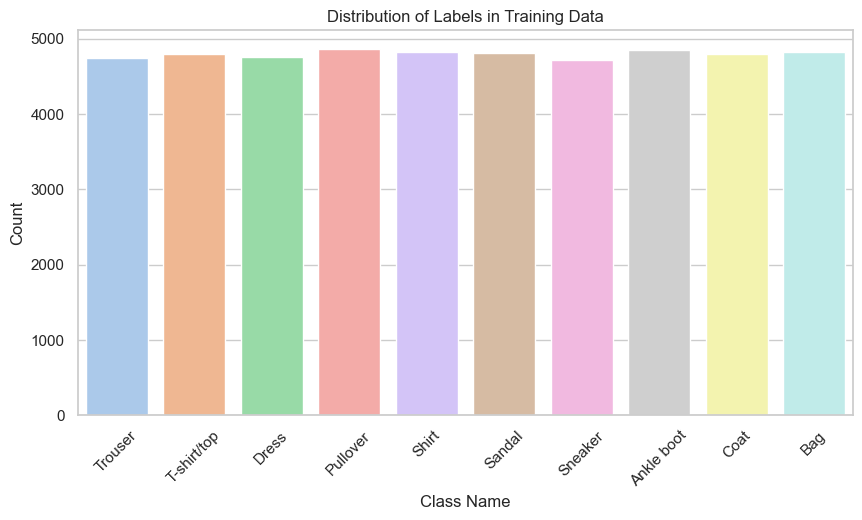

In [15]:
# Visualize the distribution of class labels in the training dataset
plt.figure(figsize=(10, 5))
sns.countplot(
    x=train_df['label'].map(idx_to_class),  # Inline mapping from numeric labels to class names
    hue=train_df['label'].map(idx_to_class),  # Set hue to the same as x to avoid the warning
    palette='pastel',
    legend=False
)
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Save the plot using the save_plot() function
save_plot("label_distribution_train.png")

# Display the plot
plt.show()

### Interpretation of the Plot:

- The bar plot shows the **distribution of samples for each class** in the training dataset.
- Each bar represents one of the 10 fashion categories in the Fashion MNIST dataset (e.g., "T-shirt/top", "Trouser", "Sandal").
- The counts for each class are almost equal, indicating that the dataset is **balanced**. This is beneficial for training machine learning models, as balanced datasets help prevent bias towards certain classes.

### Key Insights:

- The dataset contains approximately the same number of samples for each class (around **5,000 samples per class**).
- The balanced distribution suggests that we do not need to apply any techniques to handle class imbalance before model training.

✅ Plot saved successfully at: ../figures/EDA_plots/class_distribution_pie_chart.png


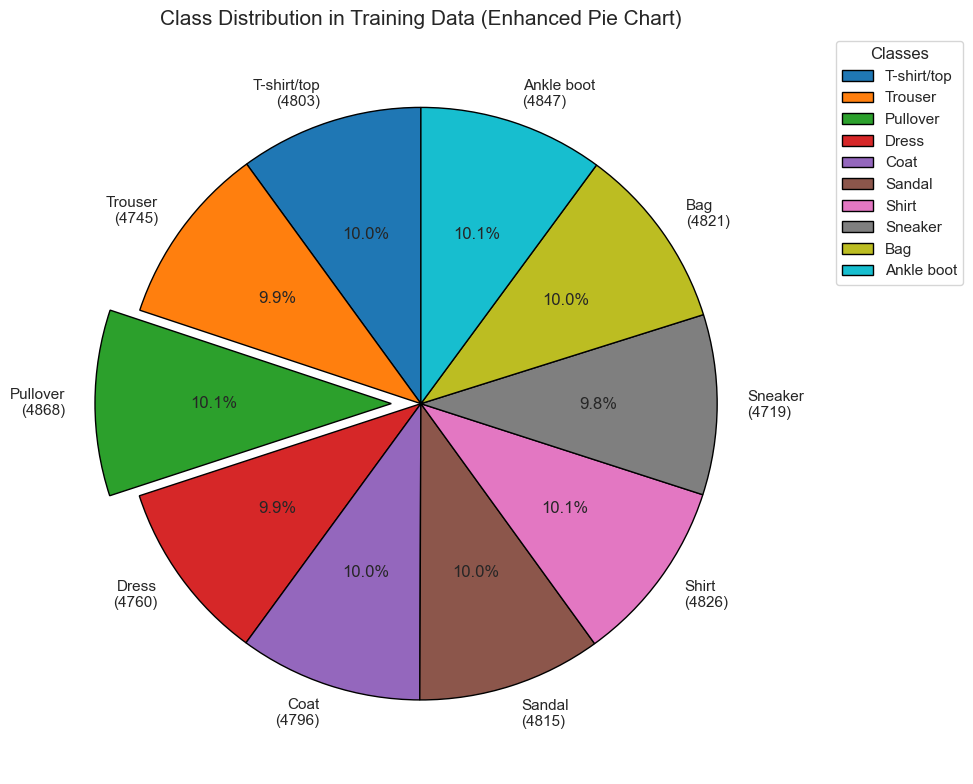

In [16]:
# Calculate class distribution
class_counts = train_df['label'].value_counts().sort_index()
class_names = [idx_to_class[i] for i in class_counts.index]
sizes = class_counts.values

# Custom color palette
colors = sns.color_palette('tab10', len(class_names))

# Explode the largest slice
explode = [0.1 if size == max(sizes) else 0 for size in sizes]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    labels=[f"{name}\n({size})" for name, size in zip(class_names, sizes)],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Class Distribution in Training Data (Enhanced Pie Chart)', fontsize=15)
plt.legend(class_names, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot using the save_plot() function
save_plot("class_distribution_pie_chart.png")

# Display the plot
plt.show()

### Interpretation of the Plot:

- The pie chart shows the **distribution of classes** in the training dataset, with each slice representing a different fashion category (e.g., "T-shirt/top", "Sneaker").
- The sizes of the slices are **almost equal**, indicating a balanced dataset. This is beneficial for training models, as it reduces the risk of bias towards certain classes.
- The largest slice (e.g., "Ankle boot") is slightly exploded for emphasis, making it stand out visually.

### Insights:

- The percentages for each class are very close to **10%**, confirming that the dataset is **well-balanced** across all 10 categories.
- This balanced distribution suggests that we do not need to apply techniques like oversampling or undersampling for class imbalance before model training.

## 5. Visualizing Sample Images

✅ Plot saved successfully at: ../figures/EDA_plots/sample_images_grid.png


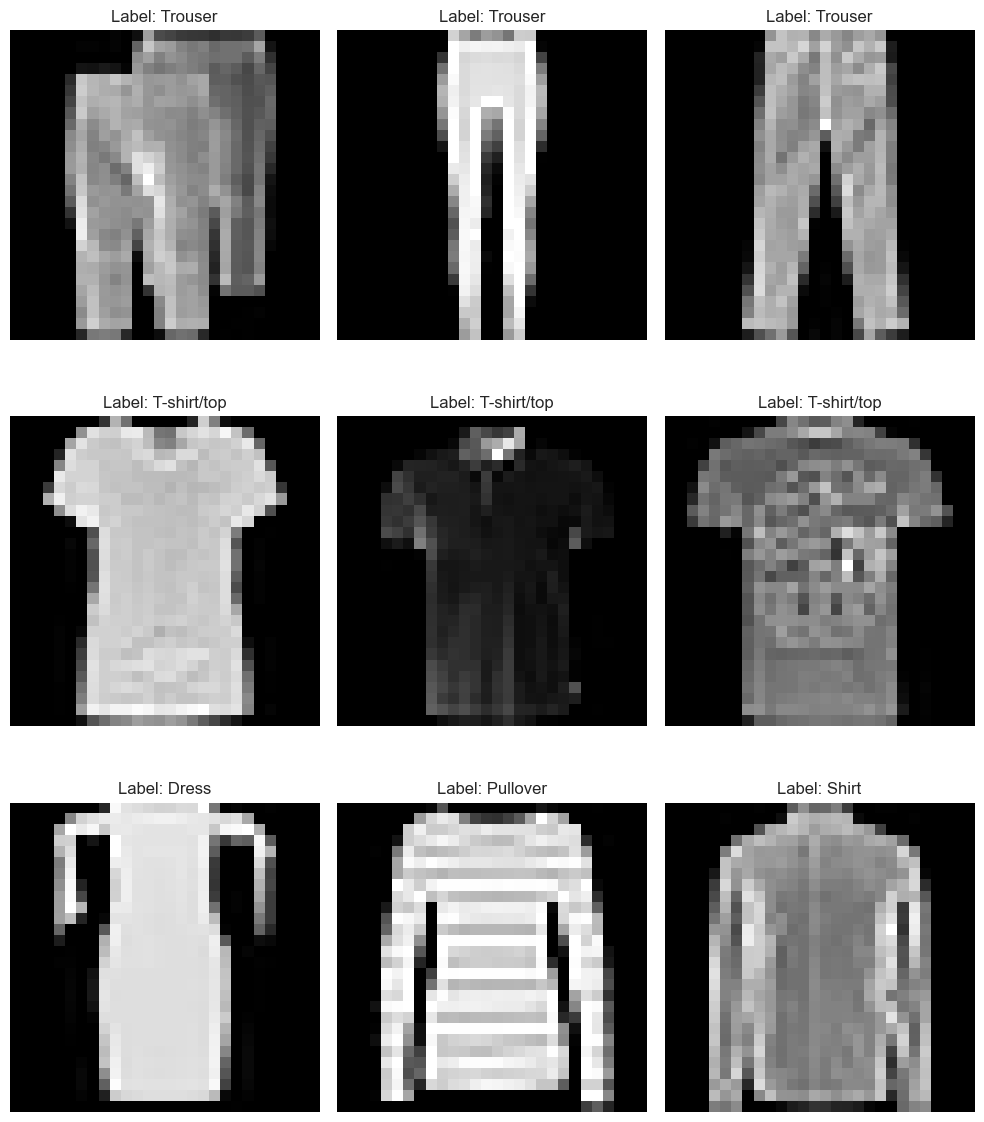

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a sample image with class label name
def plot_sample_image(dataframe, index):
    label_idx = dataframe.loc[index, 'label']
    label_name = idx_to_class[label_idx]
    pixels = dataframe.iloc[index, 1:].values.reshape(28, 28)
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Label: {label_name}")
    plt.axis('off')

# Plotting a 5x2 grid of sample images with class labels
plt.figure(figsize=(10, 12))
for i in range(9):  # Display 10 images (5 rows, 2 columns)
    plt.subplot(3, 3, i + 1)
    plot_sample_image(train_df, i)

plt.tight_layout()

# Save the plot using the save_plot() function
save_plot("sample_images_grid.png")

# Display the plot
plt.show()

### Plot Interpretation:

- The plot displays a **3x3 grid** of sample images from the Fashion MNIST dataset.
- Each image is labeled with its corresponding class name (e.g., "T-shirt/top", "Sneaker").
- The grayscale visualization allows us to see the pixel intensity values, which represent the features used by the model for training.

### Insights:

- The sample images give a good overview of the variety in the Fashion MNIST dataset.
- We can visually confirm that the images correspond correctly to their labels (e.g., "T-shirt/top" looks like a T-shirt, "Ankle boot" resembles a boot).
- This step helps verify that the data has been loaded and mapped correctly, providing confidence before moving on to model training.

## 6. Analyze Pixel Value Distribution

✅ Plot saved successfully at: ../figures/EDA_plots/pixel_value_distribution.png


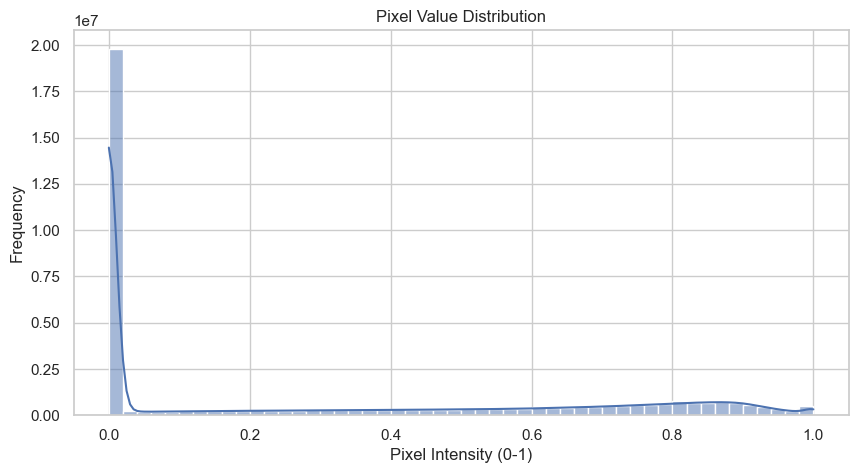

In [18]:
# Flatten all pixel columns to analyze their distribution
pixel_values = train_df.iloc[:, 1:].values.flatten()

# Plot the histogram of pixel values
plt.figure(figsize=(10, 5))
sns.histplot(pixel_values, bins=50, kde=True)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Intensity (0-1)")
plt.ylabel("Frequency")

# Save the plot using the save_plot() function
save_plot("pixel_value_distribution.png")

# Display the plot
plt.show()

### Interpretation:

- The histogram reveals that the majority of pixel values are close to `0`, indicating that a large portion of the image background is black or very dark.
- There is a long tail extending towards `1`, but the frequency of these higher intensity pixels is much lower, suggesting that brighter pixels are less common.
- This type of distribution is expected for fashion images where the background is typically dark, and only the clothing items have varying intensity values.
- Understanding this distribution helps verify the preprocessing steps (e.g., normalization) and provides insights into the dataset's characteristics before model training.


## 7. Correlation Analysis

✅ Plot saved successfully at: ../figures/EDA_plots/correlation_heatmap_first_100_pixels.png


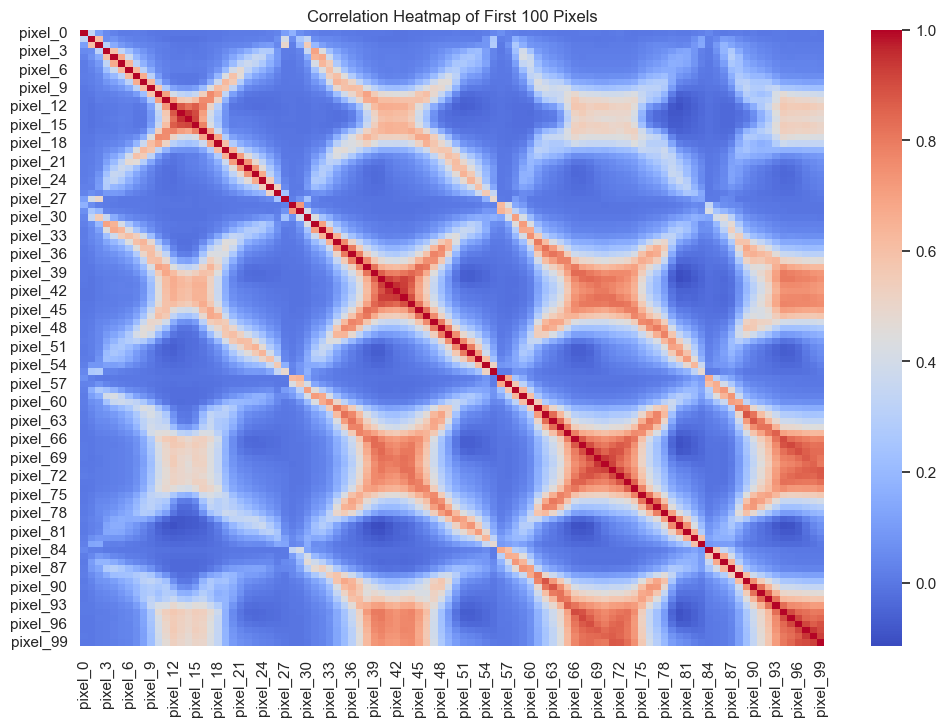

In [19]:
# Calculate the correlation matrix for a subset of pixels
correlation_matrix = train_df.iloc[:, 1:101].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of First 100 Pixels")

# Save the plot using the save_plot() function
save_plot("correlation_heatmap_first_100_pixels.png")

# Display the plot
plt.show()

### Interpretation of the Plot:

- The **diagonal** of the heatmap is bright red with a value of 1.0, indicating a perfect correlation of each pixel with itself.
- The presence of **red or orange squares** outside the diagonal indicates positive correlation between certain pixels, suggesting that these pixels tend to have similar intensity values.
- The **blue squares** represent negative correlations, suggesting that certain pixels have opposite intensity trends.
- The symmetric nature of the heatmap reflects that the correlation between pixel A and pixel B is the same as the correlation between pixel B and pixel A.

### Insights:

- The plot helps identify patterns of pixel correlations, indicating which areas of the image may have similar or complementary intensity values.
- Identifying pixel correlations can be useful for feature extraction, as highly correlated pixels might convey redundant information.
- The heatmap suggests that the dataset contains some structural regularity, as seen by the recurring red and blue patterns. This could be attributed to similar image structures (e.g., vertical or horizontal lines) in the Fashion MNIST dataset.

✅ Plot saved successfully at: ../figures/EDA_plots/correlation_heatmap_random_100_pixels.png


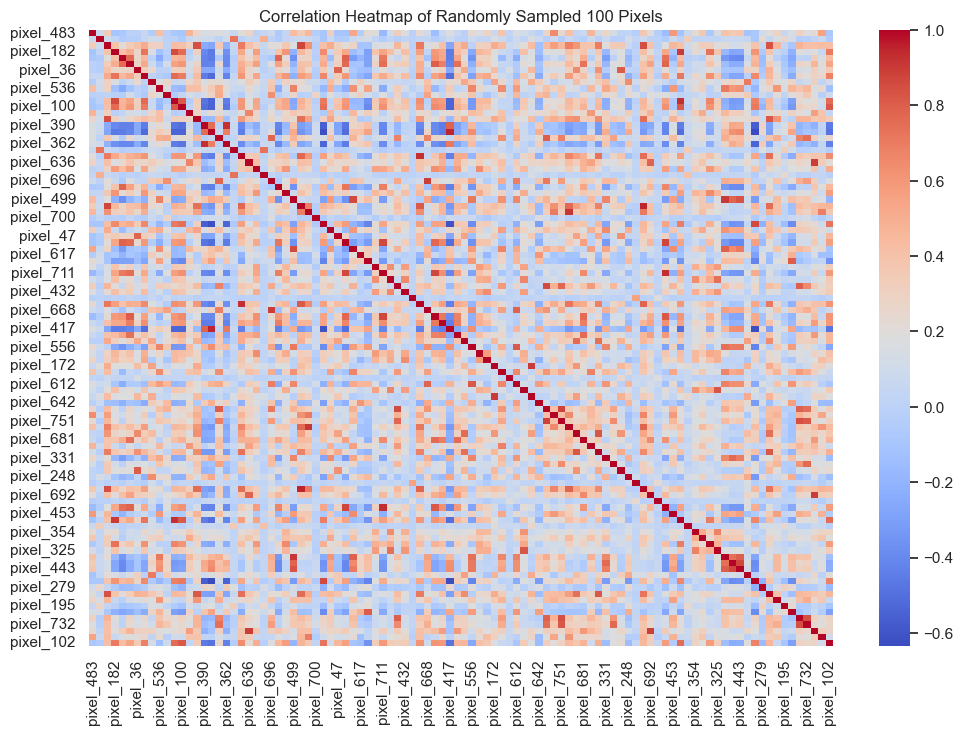

In [20]:
# Randomly sample 100 pixel columns from the DataFrame (excluding the label column)
random_pixel_columns = np.random.choice(train_df.columns[1:], size=100, replace=False)

# Calculate the correlation matrix for the randomly sampled pixels
correlation_matrix = train_df[random_pixel_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Randomly Sampled 100 Pixels")

# Save the plot using the save_plot() function
save_plot("correlation_heatmap_random_100_pixels.png")

# Display the plot
plt.show()

### Interpretation of the Correlation Heatmap

#### Purpose of the Heatmap
This heatmap visualizes the correlation between randomly selected 100 pixel columns from the Fashion MNIST dataset. It helps in understanding how certain pixels relate to each other across the images in the dataset.

#### Diagonal Line (Perfect Correlation)
The diagonal line from the top left to the bottom right is bright red, indicating a perfect correlation of `1.0`. This is expected since each pixel is perfectly correlated with itself.

#### Positive and Negative Correlations
- **Red Squares (Positive Correlation):** Pixels that are positively correlated tend to have similar intensity values. This suggests that these pixels might belong to the same region or have similar visual features (e.g., adjacent pixels in the image or parts of the same object).
- **Blue Squares (Negative Correlation):** Pixels that show negative correlations have opposite intensity trends. This could indicate pixels that belong to different regions of the image (e.g., the edge of an object versus the background).

#### Lack of Strong Patterns
The heatmap does not show large, distinct blocks of red or blue outside the diagonal. This suggests that there is no strong, consistent correlation among most randomly selected pixels. It is typical for image data like Fashion MNIST, where pixel values are not highly correlated unless they are close in the image or part of the same feature.

#### Implication for Dimensionality Reduction
The absence of strong correlations among most of the pixels indicates that the dataset may contain significant noise or a large amount of variability. This justifies the need for dimensionality reduction techniques like PCA, which can help identify key features and reduce redundancy.

#### Potential Areas of Interest
The small red or blue squares outside the diagonal suggest regions where certain pixels exhibit similar or opposite behavior. This can provide hints about patterns in the dataset, such as common edges or shared textures across images.

#### Conclusion
The heatmap helps verify that the randomly sampled pixels have varied correlations, which is expected given the nature of the Fashion MNIST dataset. The analysis suggests that while some pixel pairs have minor correlations, there is no dominant pattern, highlighting the complexity and variability of the data.

## Dimensionality Reduction Visualization

✅ Plot saved successfully at: ../figures/EDA_plots/3d_pca_projection_fashion_mnist.png


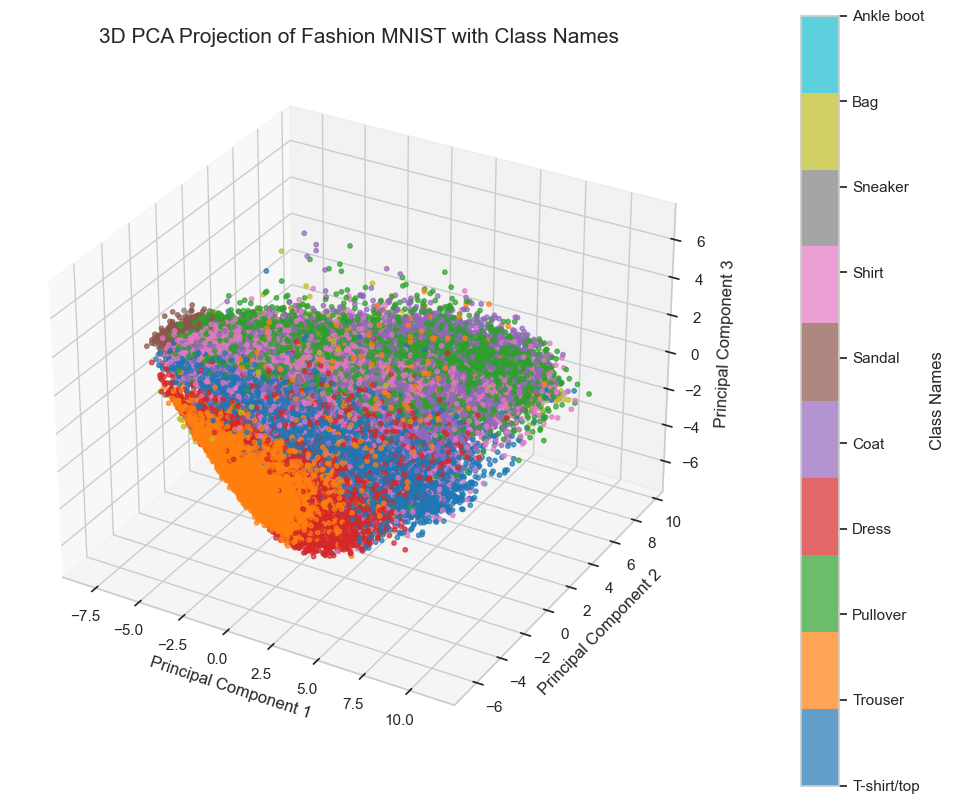

In [21]:
# Extract pixel values and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df['label'].values

# Apply PCA to reduce the dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Create a 3D scatter plot with custom colormap
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use the 'tab10' colormap for distinct class colors
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y_train, cmap='tab10', alpha=0.7, s=10)

# Set labels and title
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.set_title("3D PCA Projection of Fashion MNIST with Class Names", fontsize=15)

# Add a color bar with class names instead of numeric labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Class Names", fontsize=12)
cbar.set_ticks(range(10))
cbar.set_ticklabels([idx_to_class[i] for i in range(10)])

# Improve plot aesthetics
ax.grid(True)

# Save the plot using the save_plot() function
save_plot("3d_pca_projection_fashion_mnist.png", fig)

# Display the plot
plt.show()

### Plot Interpretation

- The 3D scatter plot shows a projection of the Fashion MNIST data onto its first three principal components.
- Each point represents an image, colored according to its class label (e.g., T-shirt, Sneaker, Ankle boot).
- The distinct clusters indicate how well PCA separates different classes based on the reduced dimensions.
- The variance explained by the first three components totals to around **52.80%**, capturing a significant portion of the information in the data.

### Insights

1. **Class Separation**:
   - Some classes (e.g., T-shirts and Ankle boots) form distinct clusters, showing effective feature separation by PCA.
   - Overlapping classes (e.g., Shirt and Pullover) suggest shared features, making them harder to distinguish.

2. **Effectiveness of Dimensionality Reduction**:
   - The PCA projection highlights the potential for using lower-dimensional representations, reducing computational costs while preserving information.
   - This analysis provides an understanding of data distribution and relationships between classes before model training.

In [22]:
# Explained variance ratio for the first three components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Explained variance by PC3: {explained_variance[2]:.2%}")

Explained variance by PC1: 28.98%
Explained variance by PC2: 17.72%
Explained variance by PC3: 6.04%


**Variance Explained**:
   - The first principal component captures the most variance (29.08%), showing its importance in representing the data.
   - Subsequent components capture diminishing variance, indicating less new information.

✅ Plot saved successfully at: ../figures/EDA_plots/heatmaps_of_pca_components.png


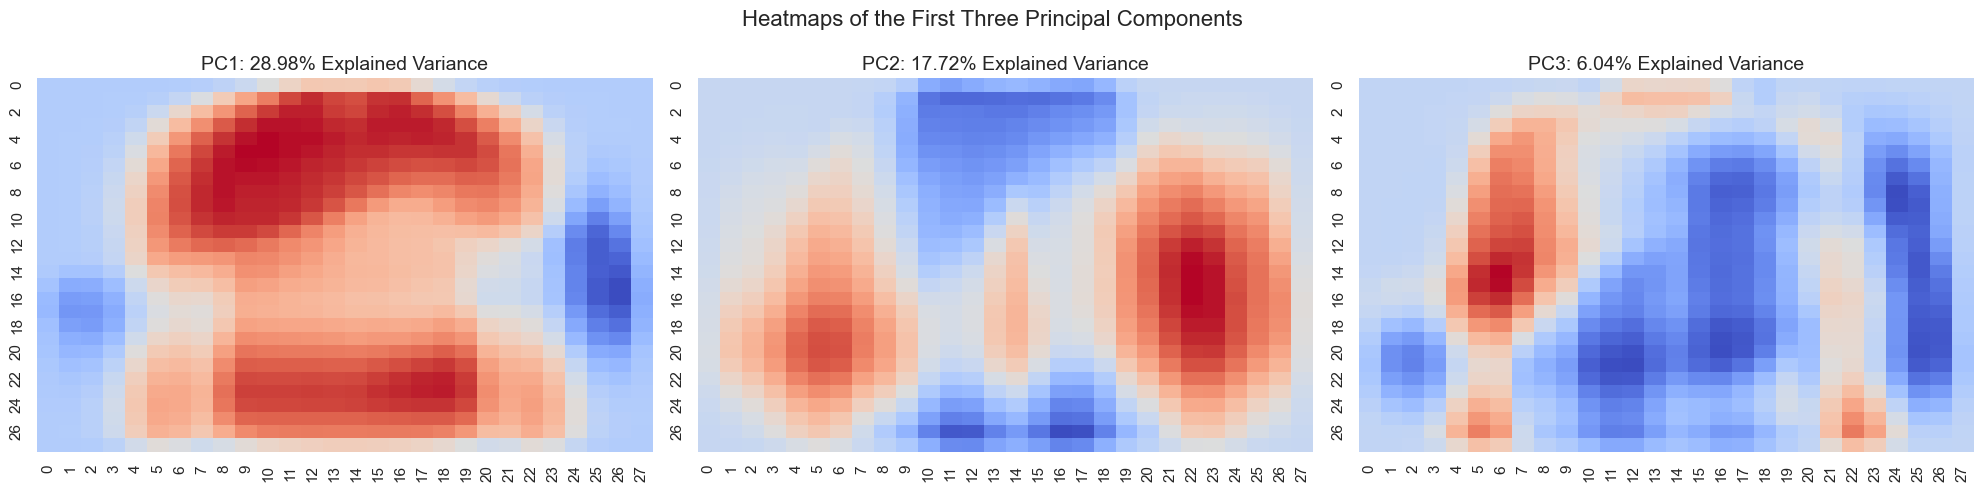

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Extract the principal components and reshape them to 28x28
pc1 = pca.components_[0].reshape(28, 28)
pc2 = pca.components_[1].reshape(28, 28)
pc3 = pca.components_[2].reshape(28, 28)

# Plotting the heatmaps for the first three PCA components
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))

# Heatmap for the first principal component
sns.heatmap(pc1, cmap='coolwarm', ax=axarr[0], cbar=False)
axarr[0].set_title(f"PC1: {explained_variance_ratio[0]:.2%} Explained Variance", fontsize=14)

# Heatmap for the second principal component
sns.heatmap(pc2, cmap='coolwarm', ax=axarr[1], cbar=False)
axarr[1].set_title(f"PC2: {explained_variance_ratio[1]:.2%} Explained Variance", fontsize=14)

# Heatmap for the third principal component
sns.heatmap(pc3, cmap='coolwarm', ax=axarr[2], cbar=False)
axarr[2].set_title(f"PC3: {explained_variance_ratio[2]:.2%} Explained Variance", fontsize=14)

# Adjust layout
plt.suptitle("Heatmaps of the First Three Principal Components", fontsize=16)
plt.tight_layout()

# Save the plot using the save_plot() function
save_plot("heatmaps_of_pca_components.png", fig)

# Display the plot
plt.show()

### Plot Interpretation

- **Principal Component 1 (PC1):**
  - This component explains **29.08%** of the variance.
  - The heatmap shows dominant patterns in the data, highlighting the most significant intensity variations across the dataset.

- **Principal Component 2 (PC2):**
  - This component explains **17.70%** of the variance.
  - The heatmap indicates different patterns of pixel intensities, capturing additional features not explained by PC1.

- **Principal Component 3 (PC3):**
  - This component explains **6.02%** of the variance.
  - The heatmap reveals more subtle and localized patterns, capturing finer details in the data.

### Insights

1. **Information Retention:**
   - The first three principal components collectively capture a significant portion of the data's variance (over 52%).
   - This suggests that a reduced representation using only a few components can still preserve much of the dataset's information.

2. **Pattern Analysis:**
   - The heatmaps highlight different aspects of the dataset's structure.
   - PC1 captures the most prominent features (e.g., general shape), while subsequent components capture finer and more localized details.

3. **Dimensionality Reduction Benefit:**
   - Visualizing the principal components helps understand the dominant patterns and features in the data, aiding in feature selection and model interpretation.
   - This analysis also demonstrates the potential for using lower-dimensional representations to speed up computations while retaining meaningful information.

✅ Plot saved successfully at: ../figures/EDA_plots/cumulative_explained_variance.png


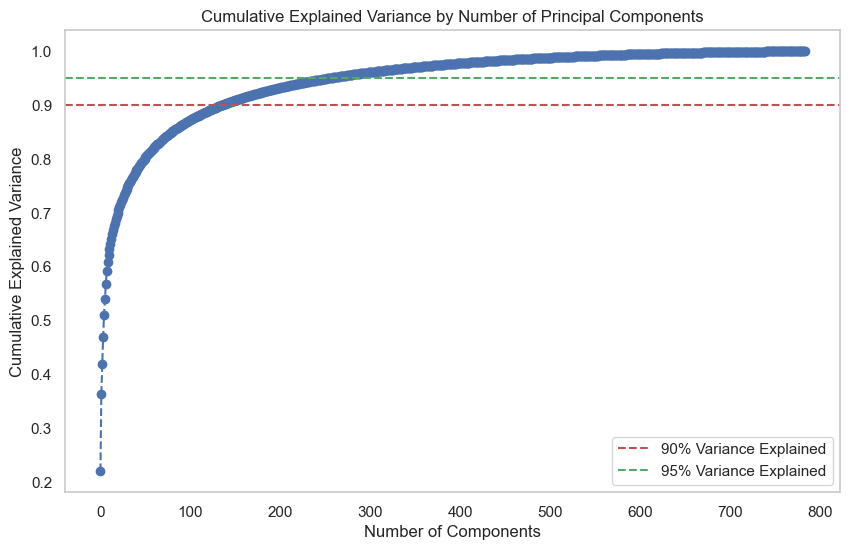

Ideal number of components for 90% variance explained: 137
Ideal number of components for 95% variance explained: 256


In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Standardize the data (optional, but recommended for PCA)
from sklearn.preprocessing import StandardScaler
X_train = train_df.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Explained')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance Explained')
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.legend()

# Save the plot using the save_plot() function
save_plot("cumulative_explained_variance.png")

# Display the plot
plt.show()

# Determine the number of components needed for 90% and 95% variance explained
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Ideal number of components for 90% variance explained: {n_components_90}")
print(f"Ideal number of components for 95% variance explained: {n_components_95}")

### Plot Interpretation

- **Explained Variance Trend:**
  - The scree plot displays the explained variance for each principal component, showing a steep drop-off for the first few components.
  - The first few components explain most of the variance, indicating their importance.

- **Elbow or Knee Point:**
  - The plot shows a clear "elbow" or knee point, after which the explained variance becomes minimal.
  - This elbow point helps determine the optimal number of components to retain, as additional components beyond this point contribute little new information.

- **Diminishing Returns:**
  - Beyond the first few components, the explained variance ratio flattens out, indicating diminishing returns from including more components.

### Insights

1. **Effective Feature Reduction:**
   - The steep decline in the first few components suggests that the majority of the variance can be captured using only a subset of the total components.
   - This supports using PCA for feature reduction, as it helps remove noise and irrelevant features.

2. **Visual Identification of Key Components:**
   - The elbow point is a strong visual indicator for selecting the optimal number of components, making it a useful guide for dimensionality reduction.
   - Components beyond the elbow point have low variance, indicating they contribute little to the dataset's structure.

3. **Simplified Model Training:**
   - By focusing on the first few components, we can reduce the computational complexity and enhance model performance without losing significant information.

✅ Plot saved successfully at: ../figures/EDA_plots/scree_plot_pca_components.png


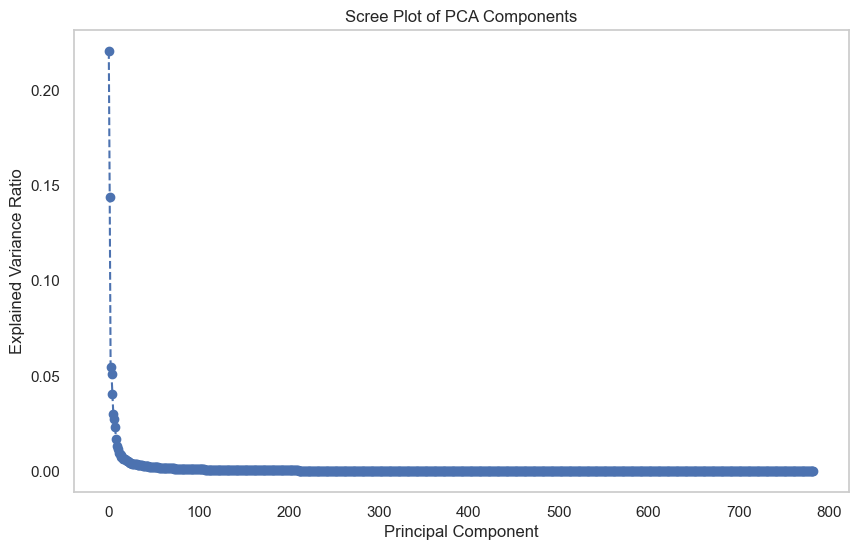

In [25]:
# Plot the explained variance for each component (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.title("Scree Plot of PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid()

# Save the plot using the save_plot() function
save_plot("scree_plot_pca_components.png")

# Display the plot
plt.show()

### Plot Interpretation

- The **Scree Plot** visualizes the explained variance ratio of each principal component.
- **Sharp Drop at the Start:**
  - The plot shows a steep decline in the explained variance for the first few principal components.
  - The first few components capture most of the variance, indicating that they are the most informative.

- **Knee Point:**
  - The plot exhibits a "knee" or an elbow point, beyond which the explained variance becomes almost negligible.
  - This knee point is a visual indicator of the optimal number of components to retain, as components beyond this point contribute minimally to explaining the variance.

- **Flat Tail:**
  - After approximately 20 components, the curve flattens, suggesting that additional components explain very little variance.
  - This flattening indicates diminishing returns from including more components, supporting the use of dimensionality reduction techniques.

### Insights

1. **Effective Dimensionality Reduction:**
   - The plot suggests that only a small subset of the principal components are needed to capture the majority of the variance.
   - This helps guide decisions on the number of components to retain when performing PCA for feature reduction.

2. **Feature Importance:**
   - The initial components have the highest explained variance, highlighting their importance in representing the dataset.
   - Components with low explained variance can be safely discarded, reducing noise and simplifying the model.

## t-SNE Visualization

✅ Plot saved successfully at: ../figures/EDA_plots/tsne_scatter_plot_fashion_mnist.png


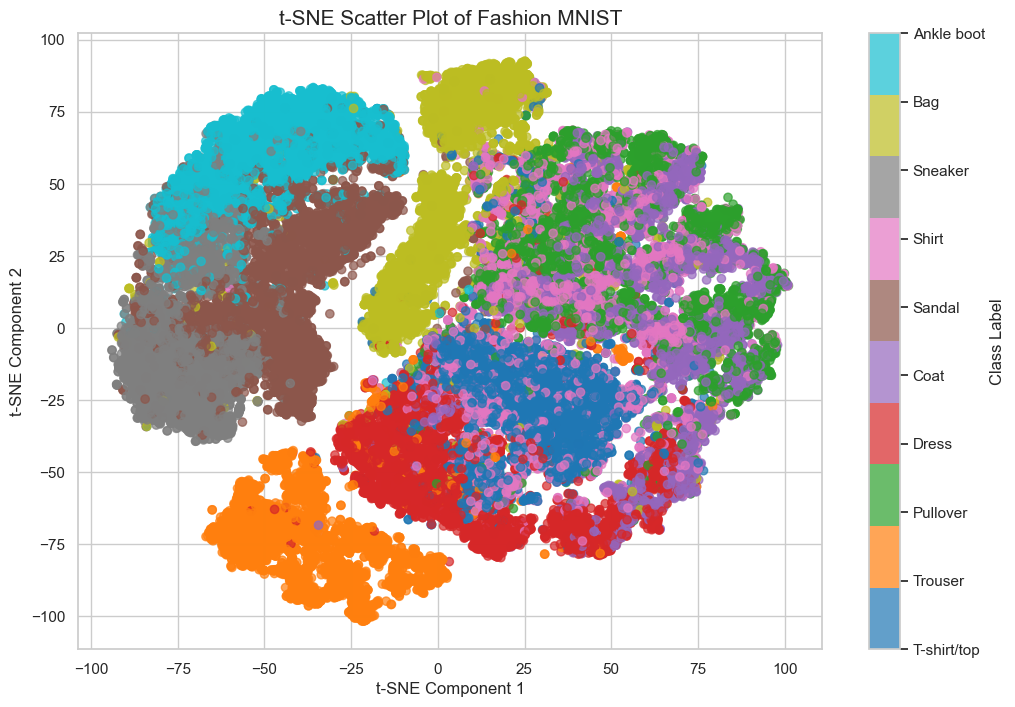

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Extracting features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df['label'].values

# Standardize the data (recommended for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Perform t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_train_tsne = tsne.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_train_tsne[:, 0],
    X_train_tsne[:, 1],
    c=y_train,
    cmap='tab10',
    alpha=0.7
)

# Add labels and title
plt.title('t-SNE Scatter Plot of Fashion MNIST', fontsize=15)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Add color bar with class names
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label('Class Label', fontsize=12)
cbar.set_ticks(range(10))
cbar.set_ticklabels([idx_to_class[i] for i in range(10)])

# Save the plot using the save_plot() function
save_plot("tsne_scatter_plot_fashion_mnist.png")

# Display the plot
plt.show()

### Plot Interpretation

**Cluster Formation:**
- The t-SNE scatter plot shows clusters of data points, with each cluster corresponding to a different class in the Fashion MNIST dataset.
- The distinct and well-separated clusters suggest that the t-SNE algorithm successfully captured the underlying structure of the data, even after reducing it to two dimensions.

**Class Separation:**
- Certain classes, such as *T-shirt/top* and *Ankle boot*, form distinct and well-separated clusters, indicating strong feature differences.
- Overlapping clusters (e.g., *Shirt* and *Pullover*) suggest that these classes may have similar features, making them harder to distinguish.

**Color Coding:**
- The colors in the scatter plot represent different fashion item categories, as indicated by the color bar on the right.
- The legend maps the numeric labels to their corresponding class names (e.g., *Sneaker*, *Dress*).

### Insights

**Dimensionality Reduction:**
- The t-SNE plot reveals that even with a two-dimensional representation, the data preserves meaningful clusters, which is useful for visualizing high-dimensional data.

**Class Overlap:**
- The overlap between certain classes indicates that these classes share similar features, making them more challenging to distinguish. This information is valuable when considering classification model performance.

**Effective Visualization:**
- t-SNE provides an effective way to visualize complex, high-dimensional data in a lower-dimensional space, capturing non-linear relationships and providing insights into class structure.
